# **Install and Import Library**

In [2]:
!pip3 install Sastrawi

In [3]:
import nltk
import re
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm
from scipy import stats
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [4]:
# Download resource nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
# inisialisasi tqdm untuk melihat progress
tqdm.pandas()

# **Load Dataset**

In [6]:
df_news_data = pd.read_csv("C:/Users/User/Jupyter Notebook/PBA/Bahan Kelompok/Scrapping News Text/cnn_news_bpjs.csv", encoding='latin1')
df_news_data

,Judul,Tag,Link,Text,Date,Portal Berita
0,"Bantu Donasi untuk Pengobatan Jafar, Bocah den...",Ragam Gaya Lainnya,https://www.cnnindonesia.com/gaya-hidup/202406...,Jafar Naufail Syairazi harus menerima cobaan b...,2024-06-10T12:30:39+07:00,CNN
1,Menimbang Untung Rugi Asuransi yang Tak Pernah...,Artikel Sponsor,https://www.cnnindonesia.com/gaya-hidup/202403...,Literasi keuangan yang rendah pada masyarakat ...,2024-03-27T00:00:00+07:00,CNN
2,Daikin Jadi Korporasi Teratas Dalam Kepedulian...,Artikel Sponsor,https://www.cnnindonesia.com/gaya-hidup/202403...,Direktur Kepesertaan pada Badan Penyelenggara ...,2024-03-26T00:00:00+07:00,CNN
3,Mayapada dan Kalbe Farma Wujudkan Ekosistem La...,Ragam Health,https://www.cnnindonesia.com/gaya-hidup/202402...,Mayapada Healthcare Group melalui PT Sejahtera...,2024-02-16T13:22:02+07:00,CNN
4,"Cabut Omnibus Law, Agenda Pertama Partai Buruh...",Artikel Sponsor,https://www.cnnindonesia.com/gaya-hidup/202402...,"Partai Buruh menyampaikan tekad, saat dipastik...",2024-02-09T00:00:00+07:00,CNN
5,"Kampanye di Papua, Partai Buruh Siap Kerja bua...",Artikel Sponsor,https://www.cnnindonesia.com/gaya-hidup/202402...,Partai Buruh terus melanjutkan agenda kampanye...,2024-02-07T00:00:00+07:00,CNN
6,Melihat Lebih Detail Visi Misi Kesehatan 3 Pas...,Berita Health,https://www.cnnindonesia.com/gaya-hidup/202401...,Debat kelima Pilpres 2024 salah satunya akan d...,2024-01-31T16:14:01+07:00,CNN
7,Apa Bedanya Pneumonia Biasa dan Infeksi Bakter...,Berita Health,https://www.cnnindonesia.com/gaya-hidup/202312...,Mungkin banyak orang yang masih bertanya-tanya...,2023-12-07T07:45:32+07:00,CNN
8,"Perhatian, Masih Ada Vaksin Covid-19 Gratis sa...",Berita Health,https://www.cnnindonesia.com/gaya-hidup/202312...,"Sudah vaksin Covid-19? Jika belum, program vak...",2023-12-06T11:30:01+07:00,CNN
9,Kemenkes di World Stroke Day: 19 Persen Kemati...,Berita Health,https://www.cnnindonesia.com/gaya-hidup/202310...,Kementerian Kesehatan (Kemenkes) menyebut peny...,2023-10-29T14:33:43+07:00,CNN


In [7]:
df_news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Judul          51 non-null     object
 1   Tag            51 non-null     object
 2   Link           51 non-null     object
 3   Text           51 non-null     object
 4   Date           51 non-null     object
 5   Portal Berita  51 non-null     object
dtypes: object(6)
memory usage: 2.5+ KB


In [12]:
df_news_text = pd.read_csv("C:/Users/User/Jupyter Notebook/PBA/Bahan Kelompok/Scrapping News Text/cnn_news_bpjs.csv", encoding='latin1')
df_news_text

,Judul,Tag,Link,Text,Date,Portal Berita
0,"Bantu Donasi untuk Pengobatan Jafar, Bocah den...",Ragam Gaya Lainnya,https://www.cnnindonesia.com/gaya-hidup/202406...,Jafar Naufail Syairazi harus menerima cobaan b...,2024-06-10T12:30:39+07:00,CNN
1,Menimbang Untung Rugi Asuransi yang Tak Pernah...,Artikel Sponsor,https://www.cnnindonesia.com/gaya-hidup/202403...,Literasi keuangan yang rendah pada masyarakat ...,2024-03-27T00:00:00+07:00,CNN
2,Daikin Jadi Korporasi Teratas Dalam Kepedulian...,Artikel Sponsor,https://www.cnnindonesia.com/gaya-hidup/202403...,Direktur Kepesertaan pada Badan Penyelenggara ...,2024-03-26T00:00:00+07:00,CNN
3,Mayapada dan Kalbe Farma Wujudkan Ekosistem La...,Ragam Health,https://www.cnnindonesia.com/gaya-hidup/202402...,Mayapada Healthcare Group melalui PT Sejahtera...,2024-02-16T13:22:02+07:00,CNN
4,"Cabut Omnibus Law, Agenda Pertama Partai Buruh...",Artikel Sponsor,https://www.cnnindonesia.com/gaya-hidup/202402...,"Partai Buruh menyampaikan tekad, saat dipastik...",2024-02-09T00:00:00+07:00,CNN
5,"Kampanye di Papua, Partai Buruh Siap Kerja bua...",Artikel Sponsor,https://www.cnnindonesia.com/gaya-hidup/202402...,Partai Buruh terus melanjutkan agenda kampanye...,2024-02-07T00:00:00+07:00,CNN
6,Melihat Lebih Detail Visi Misi Kesehatan 3 Pas...,Berita Health,https://www.cnnindonesia.com/gaya-hidup/202401...,Debat kelima Pilpres 2024 salah satunya akan d...,2024-01-31T16:14:01+07:00,CNN
7,Apa Bedanya Pneumonia Biasa dan Infeksi Bakter...,Berita Health,https://www.cnnindonesia.com/gaya-hidup/202312...,Mungkin banyak orang yang masih bertanya-tanya...,2023-12-07T07:45:32+07:00,CNN
8,"Perhatian, Masih Ada Vaksin Covid-19 Gratis sa...",Berita Health,https://www.cnnindonesia.com/gaya-hidup/202312...,"Sudah vaksin Covid-19? Jika belum, program vak...",2023-12-06T11:30:01+07:00,CNN
9,Kemenkes di World Stroke Day: 19 Persen Kemati...,Berita Health,https://www.cnnindonesia.com/gaya-hidup/202310...,Kementerian Kesehatan (Kemenkes) menyebut peny...,2023-10-29T14:33:43+07:00,CNN


# Bagian Bawah

In [41]:
# Membaca data dari file CSV
df_news_text = pd.read_csv("C:/Users/User/Jupyter Notebook/PBA/Bahan Kelompok/Scrapping News Text/cnn_news_bpjs.csv", encoding='latin1')

# Menambahkan kolom hasil pemrosesan ke DataFrame
# Misalnya, jika Anda sudah memiliki fungsi atau metode untuk menghasilkan kolom-kolom ini, pastikan untuk menerapkannya di sini
df_news_text['n_words'] = df_news_text['Text'].apply(word_count)
df_news_text['clean'] = df_news_text['Text'].apply(cleaning_text)
df_news_text['n_clean'] = df_news_text['clean'].apply(word_count)
df_news_text['no_stopwords'] = df_news_text['clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))
df_news_text['n_no_stopwords'] = df_news_text['no_stopwords'].apply(word_count)
df_news_text['stem'] = df_news_text['no_stopwords'].apply(stemmer.stem)
df_news_text['tokens'] = df_news_text['stem'].apply(word_tokenize)

# Menampilkan DataFrame dengan kolom baru
print(df_news_text.loc[:, ["Judul", "Tag", "Link", "Date", "Portal Berita", "Text", "n_words", "clean", "n_clean", "no_stopwords", "n_no_stopwords", "stem", "tokens"]])

                                                Judul                  Tag  \
0   Bantu Donasi untuk Pengobatan Jafar, Bocah den...   Ragam Gaya Lainnya   
1   Menimbang Untung Rugi Asuransi yang Tak Pernah...      Artikel Sponsor   
2   Daikin Jadi Korporasi Teratas Dalam Kepedulian...      Artikel Sponsor   
3   Mayapada dan Kalbe Farma Wujudkan Ekosistem La...         Ragam Health   
4   Cabut Omnibus Law, Agenda Pertama Partai Buruh...      Artikel Sponsor   
5   Kampanye di Papua, Partai Buruh Siap Kerja bua...      Artikel Sponsor   
6   Melihat Lebih Detail Visi Misi Kesehatan 3 Pas...        Berita Health   
7   Apa Bedanya Pneumonia Biasa dan Infeksi Bakter...        Berita Health   
8   Perhatian, Masih Ada Vaksin Covid-19 Gratis sa...        Berita Health   
9   Kemenkes di World Stroke Day: 19 Persen Kemati...        Berita Health   
10      Kemenkes Bantah Kabar Vaksin HPV Bikin Mandul        Berita Health   
11  Donasi untuk Sekeluarga di Cianjur Idap Parkin...   Ragam Ga

In [43]:
df_news_text

,Judul,Tag,Link,Text,Date,Portal Berita,n_words,clean,n_clean,no_stopwords,n_no_stopwords,stem,tokens
0,"Bantu Donasi untuk Pengobatan Jafar, Bocah den...",Ragam Gaya Lainnya,https://www.cnnindonesia.com/gaya-hidup/202406...,Jafar Naufail Syairazi harus menerima cobaan b...,2024-06-10T12:30:39+07:00,CNN,418,Jafar Naufail Syairazi harus menerima cobaan b...,413,Jafar Naufail Syairazi menerima cobaan berat u...,221,jafar naufail syairazi terima coba berat usia ...,"[jafar, naufail, syairazi, terima, coba, berat..."
1,Menimbang Untung Rugi Asuransi yang Tak Pernah...,Artikel Sponsor,https://www.cnnindonesia.com/gaya-hidup/202403...,Literasi keuangan yang rendah pada masyarakat ...,2024-03-27T00:00:00+07:00,CNN,845,Literasi keuangan yang rendah pada masyarakat ...,841,Literasi keuangan rendah masyarakat Indonesia ...,477,literasi uang rendah masyarakat indonesia yaki...,"[literasi, uang, rendah, masyarakat, indonesia..."
2,Daikin Jadi Korporasi Teratas Dalam Kepedulian...,Artikel Sponsor,https://www.cnnindonesia.com/gaya-hidup/202403...,Direktur Kepesertaan pada Badan Penyelenggara ...,2024-03-26T00:00:00+07:00,CNN,414,Direktur Kepesertaan pada Badan Penyelenggara ...,412,Direktur Kepesertaan Badan Penyelenggara Jamin...,274,direktur serta badan selenggara jamin sosial b...,"[direktur, serta, badan, selenggara, jamin, so..."
3,Mayapada dan Kalbe Farma Wujudkan Ekosistem La...,Ragam Health,https://www.cnnindonesia.com/gaya-hidup/202402...,Mayapada Healthcare Group melalui PT Sejahtera...,2024-02-16T13:22:02+07:00,CNN,379,Mayapada Healthcare Group melalui PT Sejahtera...,375,Mayapada Healthcare Group PT Sejahteraraya Anu...,274,mayapada healthcare group pt sejahteraraya anu...,"[mayapada, healthcare, group, pt, sejahteraray..."
4,"Cabut Omnibus Law, Agenda Pertama Partai Buruh...",Artikel Sponsor,https://www.cnnindonesia.com/gaya-hidup/202402...,"Partai Buruh menyampaikan tekad, saat dipastik...",2024-02-09T00:00:00+07:00,CNN,430,Partai Buruh menyampaikan tekad saat dipastika...,423,Partai Buruh tekad kursi masuk DPR RI pencabut...,281,partai buruh tekad kursi masuk dpr ri cabut om...,"[partai, buruh, tekad, kursi, masuk, dpr, ri, ..."
5,"Kampanye di Papua, Partai Buruh Siap Kerja bua...",Artikel Sponsor,https://www.cnnindonesia.com/gaya-hidup/202402...,Partai Buruh terus melanjutkan agenda kampanye...,2024-02-07T00:00:00+07:00,CNN,471,Partai Buruh terus melanjutkan agenda kampanye...,464,Partai Buruh melanjutkan agenda kampanye nasio...,281,partai buruh lanjut agenda kampanye nasional g...,"[partai, buruh, lanjut, agenda, kampanye, nasi..."
6,Melihat Lebih Detail Visi Misi Kesehatan 3 Pas...,Berita Health,https://www.cnnindonesia.com/gaya-hidup/202401...,Debat kelima Pilpres 2024 salah satunya akan d...,2024-01-31T16:14:01+07:00,CNN,1056,Debat kelima Pilpres salah satunya akan digela...,1029,Debat Pilpres salah satunya digelar Minggu Feb...,676,debat pilpres salah satu gelar minggu februari...,"[debat, pilpres, salah, satu, gelar, minggu, f..."
7,Apa Bedanya Pneumonia Biasa dan Infeksi Bakter...,Berita Health,https://www.cnnindonesia.com/gaya-hidup/202312...,Mungkin banyak orang yang masih bertanya-tanya...,2023-12-07T07:45:32+07:00,CNN,347,Mungkin banyak orang yang masih bertanyatanya ...,343,Mungkin orang bertanyatanya bedanya pneumonia ...,214,mungkin orang bertanyatanya beda pneumonia inf...,"[mungkin, orang, bertanyatanya, beda, pneumoni..."
8,"Perhatian, Masih Ada Vaksin Covid-19 Gratis sa...",Berita Health,https://www.cnnindonesia.com/gaya-hidup/202312...,"Sudah vaksin Covid-19? Jika belum, program vak...",2023-12-06T11:30:01+07:00,CNN,304,Sudah vaksin Covid Jika belum program vaksin g...,283,Sudah vaksin Covid Jika program vaksin gratis ...,176,sudah vaksin covid jika program vaksin gratis ...,"[sudah, vaksin, covid, jika, program, vaksin, ..."
9,Kemenkes di World Stroke Day: 19 Persen Kemati...,Berita Health,https://www.cnnindonesia.com/gaya-hidup/202310...,Kementerian Kesehatan (Kemenkes) menyebut peny...,2023-10-29T14:33

In [45]:
# Menyimpan DataFrame yang sudah diperbarui ke dalam file CSV dan Excel
df_news_text.to_csv("news_kompas_cnn_1_preprocessing.csv", index=False)
df_news_text.to_excel("news_kompas_cnn_2_preprocessing.xlsx", index=False)

###

In [14]:
# Function untuk menghitung jumlah kata di dalam teks
def word_count(text: str) -> int:
  return len(text.split())

In [15]:
# Ambil teks nya saja ke DataFrame baru, dan buat kolom baru 'n_words' untuk menampung jumlah kata
df_news_text = df_news_data[['Text']].copy()
df_news_text['n_words'] = df_news_text['Text'].apply(word_count)
df_news_text.head()

,Text,n_words
0,Jafar Naufail Syairazi harus menerima cobaan b...,418
1,Literasi keuangan yang rendah pada masyarakat ...,845
2,Direktur Kepesertaan pada Badan Penyelenggara ...,414
3,Mayapada Healthcare Group melalui PT Sejahtera...,379
4,"Partai Buruh menyampaikan tekad, saat dipastik...",430


# **Preprocessing**

## **Remove Outliers (Short) Text**

Hapus teks yang isinya terlalu sedikit (karena hasil scrap tidak sempurna)

In [16]:
def remove_outliers(df, column, non_outlier_rule='-3 < z < 3', reset_index=True):
  df_mean = df[column].mean()
  df_std = df[column].std()

  df['z_score'] = stats.zscore(df[column])
  df['outlier'] = df['z_score'].apply(lambda z: False if eval(non_outlier_rule) else True)

  print(df['outlier'].value_counts())

  outliers = df.loc[df['outlier'] == True].drop(columns=['outlier', 'z_score'])
  if reset_index:
    no_outliers = df.loc[df['outlier'] == False].drop(columns=['outlier', 'z_score']).reset_index(drop=True)
  else:
    no_outliers = df.loc[df['outlier'] == False].drop(columns=['outlier', 'z_score'])

  return no_outliers, outliers

In [17]:
df_news_text, outliers = remove_outliers(df_news_text, 'n_words', 'z > -1', True)

outlier
False    45
True      6
Name: count, dtype: int64


In [18]:
outliers.sort_values(by=['n_words'], ascending=False).head(10)

,Text,n_words
10,Kabar bahaya muncul seiring dengan digencarkan...,227
22,Malangnya hidup Kakek Slamet (63 tahun) asal S...,197
25,BPJS yang selama ini Anda tahu adalah lembaga ...,194
33,Nasib pilu dialami Rafli Alvis Sattriya. Bocah...,159
34,Dian Mariska (38) mengerung kesakitan ketika n...,116
35,Eliza Laila Rahma didiagnosis mengalami Epider...,105


In [19]:
df_news_text

,Text,n_words
0,Jafar Naufail Syairazi harus menerima cobaan b...,418
1,Literasi keuangan yang rendah pada masyarakat ...,845
2,Direktur Kepesertaan pada Badan Penyelenggara ...,414
3,Mayapada Healthcare Group melalui PT Sejahtera...,379
4,"Partai Buruh menyampaikan tekad, saat dipastik...",430
5,Partai Buruh terus melanjutkan agenda kampanye...,471
6,Debat kelima Pilpres 2024 salah satunya akan d...,1056
7,Mungkin banyak orang yang masih bertanya-tanya...,347
8,"Sudah vaksin Covid-19? Jika belum, program vak...",304
9,Kementerian Kesehatan (Kemenkes) menyebut peny...,332


## **Make Lowercase**

In [20]:
# Buat semua teks menjadi format lowercase
df_news_text['Text'] = df_news_text['Text'].apply(str.lower)
df_news_text.head(5)

,Text,n_words
0,jafar naufail syairazi harus menerima cobaan b...,418
1,literasi keuangan yang rendah pada masyarakat ...,845
2,direktur kepesertaan pada badan penyelenggara ...,414
3,mayapada healthcare group melalui pt sejahtera...,379
4,"partai buruh menyampaikan tekad, saat dipastik...",430


## **Filtering by Keywords**

In [21]:
def filtering_by_keywords(df, column, keywords):
  """Buat keyword urut dari yang akan dipertahankan, baru kemudian keyword yang akan dihapus"""
  for key in keywords:
    # Hapus teks yang mengandung keyword dengan tanda (-)
    if key[0] == '-':
      pattern = f".*{key[1:]}.*"
      df[key] = df[column].str.findall(pattern).apply(lambda x: True if len(x) != 0 else False)
      df = df.loc[df[key] == False].reset_index(drop=True).drop(columns=[key])
    # Pertahankan teks yang tidak mengandung keyword dengan tanda (-)
    else:
      pattern = f".*{key}.*"
      df[key] = df[column].str.findall(pattern).apply(lambda x: True if len(x) != 0 else False)
      df = df.loc[df[key] == True].reset_index(drop=True).drop(columns=[key])
  return df

In [22]:
# Hanya mengambil teks yang mengandung kata halal, tanpa bihalal, bi halal, logo, dll.
#keywords = ['halal', '-bihalal', '-bi halal', '-logo']
#df_news_text = filtering_by_keywords(df_news_text, 'text', keywords)

In [23]:
df_news_text

,Text,n_words
0,jafar naufail syairazi harus menerima cobaan b...,418
1,literasi keuangan yang rendah pada masyarakat ...,845
2,direktur kepesertaan pada badan penyelenggara ...,414
3,mayapada healthcare group melalui pt sejahtera...,379
4,"partai buruh menyampaikan tekad, saat dipastik...",430
5,partai buruh terus melanjutkan agenda kampanye...,471
6,debat kelima pilpres 2024 salah satunya akan d...,1056
7,mungkin banyak orang yang masih bertanya-tanya...,347
8,"sudah vaksin covid-19? jika belum, program vak...",304
9,kementerian kesehatan (kemenkes) menyebut peny...,332


## **Cleaning Text**

In [24]:
def cleaning_text(text):
  # Menambah spasi setelah koma pada koma yang tidak diberi spasi
  text = re.sub(r",(?!\s)", ", ", text)
  # Menghapus tab, new line, back slice, dll
  text = text.replace('\\t', " ").replace('\\n', " ").replace('\\u', " ").replace('\\', "")
  # Menghapus karakter non ASCII (emoticon, chinese word, dll),
  text = text.encode('ascii', 'replace').decode('ascii')
  # Menghapus URL
  text = re.sub(r"(?i)(?:https?:\/\/)?(?:www\.)?(?:[a-zA-Z0-9-.]+)(?:\.[a-zA-Z]{2,6})(?:\/[^\s\r\n]*)?", "", text)
  # Menghapus angka
  text = re.sub(r"\d+", "", text)
  # Menghapus tanda baca
  text = text.translate(str.maketrans("", "", string.punctuation))
  # Menghapus whitespace di depan/belakang teks dan double++ spasi
  text = text.strip()
  text = re.sub('\s+', ' ', text)
  # Menghapus single character
  return re.sub(r"\b[a-zA-Z]\b", "", text)

In [25]:
df_news_text['clean'] = df_news_text['Text'].apply(cleaning_text)

In [26]:
# Hitung jumlah kata setelah pembersihan
df_news_text['n_clean'] = df_news_text['clean'].apply(word_count)
df_news_text.head()

,Text,n_words,clean,n_clean
0,jafar naufail syairazi harus menerima cobaan b...,418,jafar naufail syairazi harus menerima cobaan b...,413
1,literasi keuangan yang rendah pada masyarakat ...,845,literasi keuangan yang rendah pada masyarakat ...,841
2,direktur kepesertaan pada badan penyelenggara ...,414,direktur kepesertaan pada badan penyelenggara ...,412
3,mayapada healthcare group melalui pt sejahtera...,379,mayapada healthcare group melalui pt sejahtera...,375
4,"partai buruh menyampaikan tekad, saat dipastik...",430,partai buruh menyampaikan tekad saat dipastika...,423


## **Remove Stopwords**

In [27]:
# Dapatkan stopwords Indonesia dari nltk
stop = stopwords.words('indonesian')
print(f"Total ada {len(stop)} kata yang terdaftar sebagai stopwords Indonesia di nltk")
print(f"Contohnya adalah: {stop[:10]}")

Total ada 758 kata yang terdaftar sebagai stopwords Indonesia di nltk
Contohnya adalah: ['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir']


In [28]:
# Hapus stopwords dari teks berita
df_news_text['no_stopwords'] = df_news_text['clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [29]:
# Hitung jumlah kata setelah penghapusan stopwords
df_news_text['n_no_stopwords'] = df_news_text['no_stopwords'].apply(word_count)
df_news_text.head()

,Text,n_words,clean,n_clean,no_stopwords,n_no_stopwords
0,jafar naufail syairazi harus menerima cobaan b...,418,jafar naufail syairazi harus menerima cobaan b...,413,jafar naufail syairazi menerima cobaan berat u...,209
1,literasi keuangan yang rendah pada masyarakat ...,845,literasi keuangan yang rendah pada masyarakat ...,841,literasi keuangan rendah masyarakat indonesia ...,447
2,direktur kepesertaan pada badan penyelenggara ...,414,direktur kepesertaan pada badan penyelenggara ...,412,direktur kepesertaan badan penyelenggara jamin...,267
3,mayapada healthcare group melalui pt sejahtera...,379,mayapada healthcare group melalui pt sejahtera...,375,mayapada healthcare group pt sejahteraraya anu...,265
4,"partai buruh menyampaikan tekad, saat dipastik...",430,partai buruh menyampaikan tekad saat dipastika...,423,partai buruh tekad kursi masuk dpr ri pencabut...,269


## **Stemming**

In [30]:
# Membuat object stemmer dari library Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [31]:
# Lakukan stemming untuk menghapus imbuhan dari setiap kata
df_news_text['stem'] = df_news_text['no_stopwords'].progress_apply(stemmer.stem)

100%|██████████████████████████████████████████████████████████████████████████████████| 45/45 [04:30<00:00,  6.01s/it]


In [32]:
df_news_text.head()

,Text,n_words,clean,n_clean,no_stopwords,n_no_stopwords,stem
0,jafar naufail syairazi harus menerima cobaan b...,418,jafar naufail syairazi harus menerima cobaan b...,413,jafar naufail syairazi menerima cobaan berat u...,209,jafar naufail syairazi terima coba berat usia ...
1,literasi keuangan yang rendah pada masyarakat ...,845,literasi keuangan yang rendah pada masyarakat ...,841,literasi keuangan rendah masyarakat indonesia ...,447,literasi uang rendah masyarakat indonesia yaki...
2,direktur kepesertaan pada badan penyelenggara ...,414,direktur kepesertaan pada badan penyelenggara ...,412,direktur kepesertaan badan penyelenggara jamin...,267,direktur serta badan selenggara jamin sosial b...
3,mayapada healthcare group melalui pt sejahtera...,379,mayapada healthcare group melalui pt sejahtera...,375,mayapada healthcare group pt sejahteraraya anu...,265,mayapada healthcare group pt sejahteraraya anu...
4,"partai buruh menyampaikan tekad, saat dipastik...",430,partai buruh menyampaikan tekad saat dipastika...,423,partai buruh tekad kursi masuk dpr ri pencabut...,269,partai buruh tekad kursi masuk dpr ri cabut om...


## **Frequency Words**

In [33]:
# Mendapatkan nilai freq words dalam DataFrame
def freq_words(df_column):
  all_words = ' '.join([text for text in df_column])
  all_words = all_words.split()
  fdist = FreqDist(all_words)
  return pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

In [34]:
# Plotting bar chart untuk <n> kata paling sering muncul
def bar_freq_words(df, column, n = 30):
  d = df.nlargest(columns=column, n = n)
  plt.figure(figsize=(50,10))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

In [35]:
# Dapatkan freq words hasil dari stemming, urut dari yang terbesar
df_words = freq_words(df_news_text['stem']).sort_values(by=['count'], ascending=False)
df_words.head()

,word,count
63,sehat,311
18,sakit,206
392,layan,139
112,bpjs,103
137,indonesia,99


In [36]:
# Simpan hasilnya ke dalam CSV
output_file = 'freq_words.csv'
df_words.to_csv(output_file, index=False, sep=";")

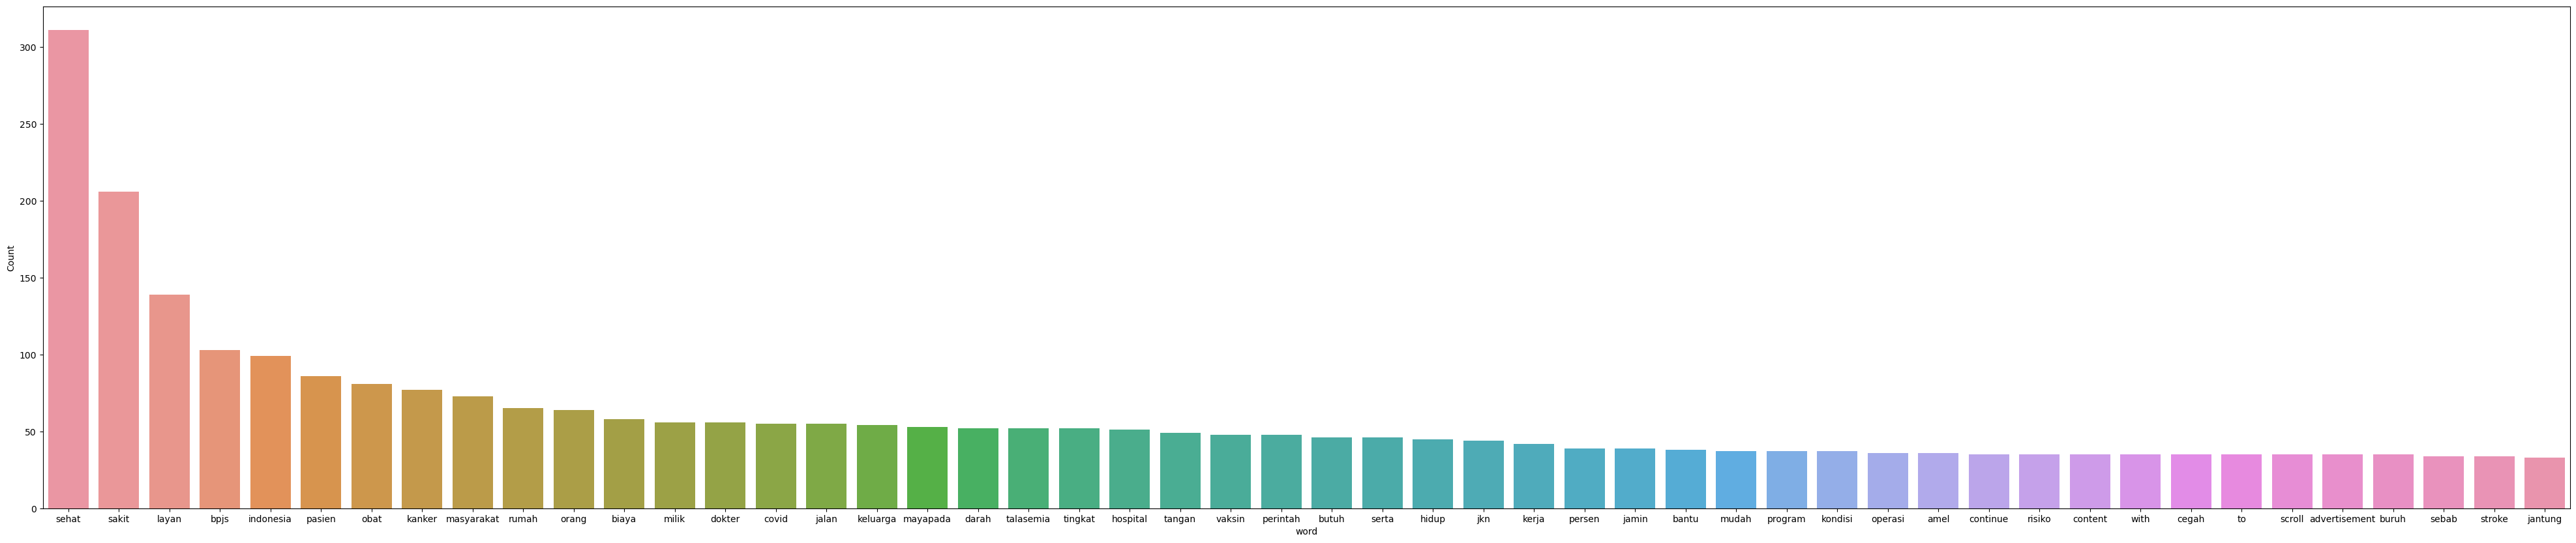

In [37]:
# Buat bar chart untuk freq words
bar_freq_words(df_words, 'count', 50)

## **Tokenization**

In [38]:
# NLTK word rokenize
df_news_text['tokens'] = df_news_text['stem'].apply(word_tokenize)
df_news_text.head()

,Text,n_words,clean,n_clean,no_stopwords,n_no_stopwords,stem,tokens
0,jafar naufail syairazi harus menerima cobaan b...,418,jafar naufail syairazi harus menerima cobaan b...,413,jafar naufail syairazi menerima cobaan berat u...,209,jafar naufail syairazi terima coba berat usia ...,"[jafar, naufail, syairazi, terima, coba, berat..."
1,literasi keuangan yang rendah pada masyarakat ...,845,literasi keuangan yang rendah pada masyarakat ...,841,literasi keuangan rendah masyarakat indonesia ...,447,literasi uang rendah masyarakat indonesia yaki...,"[literasi, uang, rendah, masyarakat, indonesia..."
2,direktur kepesertaan pada badan penyelenggara ...,414,direktur kepesertaan pada badan penyelenggara ...,412,direktur kepesertaan badan penyelenggara jamin...,267,direktur serta badan selenggara jamin sosial b...,"[direktur, serta, badan, selenggara, jamin, so..."
3,mayapada healthcare group melalui pt sejahtera...,379,mayapada healthcare group melalui pt sejahtera...,375,mayapada healthcare group pt sejahteraraya anu...,265,mayapada healthcare group pt sejahteraraya anu...,"[mayapada, healthcare, group, pt, sejahteraray..."
4,"partai buruh menyampaikan tekad, saat dipastik...",430,partai buruh menyampaikan tekad saat dipastika...,423,partai buruh tekad kursi masuk dpr ri pencabut...,269,partai buruh tekad kursi masuk dpr ri cabut om...,"[partai, buruh, tekad, kursi, masuk, dpr, ri, ..."


In [40]:
df_news_text

,Text,n_words,clean,n_clean,no_stopwords,n_no_stopwords,stem,tokens
0,jafar naufail syairazi harus menerima cobaan b...,418,jafar naufail syairazi harus menerima cobaan b...,413,jafar naufail syairazi menerima cobaan berat u...,209,jafar naufail syairazi terima coba berat usia ...,"[jafar, naufail, syairazi, terima, coba, berat..."
1,literasi keuangan yang rendah pada masyarakat ...,845,literasi keuangan yang rendah pada masyarakat ...,841,literasi keuangan rendah masyarakat indonesia ...,447,literasi uang rendah masyarakat indonesia yaki...,"[literasi, uang, rendah, masyarakat, indonesia..."
2,direktur kepesertaan pada badan penyelenggara ...,414,direktur kepesertaan pada badan penyelenggara ...,412,direktur kepesertaan badan penyelenggara jamin...,267,direktur serta badan selenggara jamin sosial b...,"[direktur, serta, badan, selenggara, jamin, so..."
3,mayapada healthcare group melalui pt sejahtera...,379,mayapada healthcare group melalui pt sejahtera...,375,mayapada healthcare group pt sejahteraraya anu...,265,mayapada healthcare group pt sejahteraraya anu...,"[mayapada, healthcare, group, pt, sejahteraray..."
4,"partai buruh menyampaikan tekad, saat dipastik...",430,partai buruh menyampaikan tekad saat dipastika...,423,partai buruh tekad kursi masuk dpr ri pencabut...,269,partai buruh tekad kursi masuk dpr ri cabut om...,"[partai, buruh, tekad, kursi, masuk, dpr, ri, ..."
5,partai buruh terus melanjutkan agenda kampanye...,471,partai buruh terus melanjutkan agenda kampanye...,464,partai buruh melanjutkan agenda kampanye nasio...,263,partai buruh lanjut agenda kampanye nasional g...,"[partai, buruh, lanjut, agenda, kampanye, nasi..."
6,debat kelima pilpres 2024 salah satunya akan d...,1056,debat kelima pilpres salah satunya akan digela...,1029,debat pilpres salah satunya digelar minggu feb...,645,debat pilpres salah satu gelar minggu februari...,"[debat, pilpres, salah, satu, gelar, minggu, f..."
7,mungkin banyak orang yang masih bertanya-tanya...,347,mungkin banyak orang yang masih bertanyatanya ...,343,orang bertanyatanya bedanya pneumonia infeksi ...,205,orang bertanyatanya beda pneumonia infeksi aki...,"[orang, bertanyatanya, beda, pneumonia, infeks..."
8,"sudah vaksin covid-19? jika belum, program vak...",304,sudah vaksin covid jika belum program vaksin g...,283,vaksin covid program vaksin gratis pemerintah ...,161,vaksin covid program vaksin gratis perintah de...,"[vaksin, covid, program, vaksin, gratis, perin..."
9,kementerian kesehatan (kemenkes) menyebut peny...,332,kementerian kesehatan kemenkes menyebut penyak...,317,kementerian kesehatan kemenkes menyebut penyak...,182,menteri sehat kemenkes sebut sakit stroke sumb...,"[menteri, sehat, kemenkes, sebut, sakit, strok..."
